<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/4.%20%EB%B6%84%EC%84%9D%EC%97%B0%EC%8A%B5/1.%20%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이번 타이타닉 데이터 분석은 오직 train/test data로만 나눴고, test 결과는 다소 test set에 과적합 되었습니다.또한 평가지표는 정확도(Accuracy)만 측정되어 정확한 평가가 이루어지지 않았음을 미리 알려드립니다.

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('train (1).csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# 필요없는 feature 제거
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


In [ ]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
# 결측값 정리
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
print('총 결측치 수:',df.isnull().sum().sum())

총 결측치 수: 0


In [ ]:
# 문자열 피처
print('Sex 값 분포 :\n',df['Sex'].value_counts())
print('\nCabin 값 분포 :\n', df['Cabin'].value_counts())
print('\nEmbarked 값 분포 :\n', df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 :
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
D11              1
B79              1
C148             1
D50              1
D48              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin 값의 결측치가 많은 뿐더러 제대로 표기 되지않음(여러개가 표기됨). Cabin의 앞은 선실 등급으로 보이며 부유한 사람(일등실)과 가난한 사람(삼등실) 대비 살아날 확률 확인 가능

In [ ]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

타이타닉 영화에서도 여성과 아이들, 노약자가 제일 먼저 구조 대상입니다.  그리고 아마 그 다음이 부자와 유명인 이었을 것입니다. 안타깝게도 삼등실에 탄 많은 가난한 사람들의 사망률이 높을 것 입니다. 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해 보겠습니다.

In [ ]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

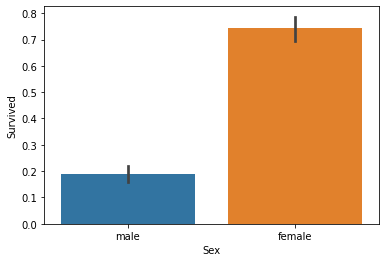

In [ ]:
# 성별에 따른 생존율
sns.barplot(x='Sex',y='Survived',data=df);

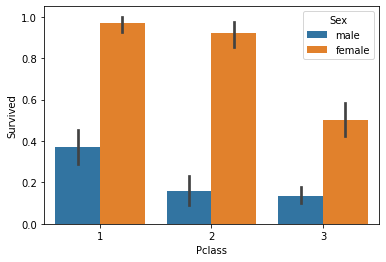

In [ ]:
# 객실 등급과 성별에 따른 생존율
sns.barplot(x='Pclass', y='Survived', hue='Sex',data=df);

여성의 경우 1,2등실에 따른 생존율이 차이가 많이 없으나, 3등실의 경우 생존률이 상대적으로 떨어짐을 알 수 있다. 남성의 경우 일등실의 생존확률이 이삼등실보다 월등히 높습니다.

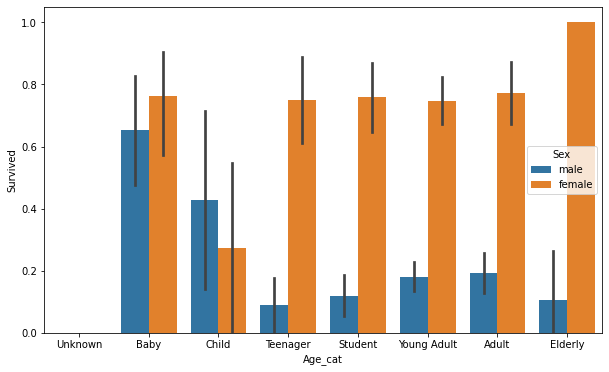

In [ ]:
# 나이에 따른 생존확률
def get_category(age):
  cat=''
  if age <=-1: cat = "Unknown"
  elif age <=5: cat = "Baby"
  elif age <=12: cat = "Child"
  elif age <=18: cat = "Teenager"
  elif age <=25: cat = "Student"
  elif age <=35: cat = "Young Adult"
  elif age <=60: cat = "Adult"
  else : cat = "Elderly"

  return cat

plt.figure(figsize=(10,6))

# X축을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환

df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=df, order=group_names)
df.drop('Age_cat', axis=1, inplace=True)

여자 Baby의 경우 비교적 생존 확률이 높았고, 여자 Chile는 다른 연령대에 비해 생존률이 낮습니다. 그리고 여자 Elderly의 경우 생존률이 매우 높았습니다. 이제까지 분석한 결과 Sex, Age, PClass 등이 중요하게 생존과 관련있는 피처임을 알 수 있었습니다.

이제 남아있는 문자열 카테고리 피처를 encoding 하겠습니다.

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
  features = ['Cabin','Sex','Embarked']
  for feature in features :
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

df = encode_features(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


지금까지 피처를 가공한 내역을 정리하고 함수만들기

In [ ]:
# Null 처리 함수
def fillna(dfo):
  dfo['Age'].fillna(dfo['Age'].mean(), inplace=True)
  dfo['Cabin'].fillna('N', inplace=True)
  dfo['Embarked'].fillna('N', inplace=True)
  dfo['Fare'].fillna(0, inplace=True)
  return dfo

# 머신러닝에 불필요한 속성 제거
def drop_features(dfo):
  dfo.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# 레이블 인코딩
def format_features(dfo):
  dfo['Cabin']= dfo['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dfo[feature])
    dfo[feature] = le.transform(dfo[feature])
  return dfo

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(dfo):
  dfo = fillna(dfo)
  dfo = drop_features(dfo)
  dfo = format_features(dfo)
  return dfo

머선러닝 알고리즘으로 생존자 예측하기
- DecisionTree
- RandomForest
- Logistic Regression

In [ ]:
# train_test_split()
from sklearn.model_selection import train_test_split
target = df['Survived']
feature = df.drop('Survived',axis=1)
X_train, X_test,y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

최적화 전 (Before)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 사이킷런 Classifir 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTree 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic Regression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTree 정확도 : 0.7877
RandomForest 정확도 : 0.8324
Logistic Regression 정확도 : 0.8268


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


최적화 후 (After)

In [ ]:
# DecisionTree & KFold

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits=folds)
  scores = []

  # KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(feature)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = feature.values[train_index], feature.values[test_index]
    y_train, y_test = target.values[train_index], target.values[test_index]

    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print("평균정확도 :{0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균정확도 :0.7823


In [ ]:
# RandomForest & KFold

# exec_kfold 호출
exec_kfold(rf_clf, folds=5)

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.8090
교차검증 2 정확도 : 0.8371
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8596
평균정확도 :0.8148


In [ ]:
# Logistic Regression & KFold

# exec_kfold 호출
exec_kfold(lr_clf, folds=5)

교차검증 0 정확도 : 0.8045
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7753
교차검증 3 정확도 : 0.7472
교차검증 4 정확도 : 0.8090
평균정확도 :0.7834


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Decision Tree & cross_val_score()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, feature, target, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도: 0.7879


In [ ]:
# RandomForest & cross_val_score()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, feature, target, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.7978
교차검증 2 정확도 : 0.8483
교차검증 3 정확도 : 0.7640
교차검증 4 정확도 : 0.8652
평균 정확도: 0.8137


In [ ]:
# Logistic Regression & cross_val_score()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, feature, target, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.7697
교차검증 2 정확도 : 0.7809
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.7978
평균 정확도: 0.7845


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# DecisionTree & GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
              'min_samples_split' : [2,3,5],
              'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('test set 정확도 :{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.8132
test set 정확도 :0.8212


In [ ]:
# RandomForest & GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
              'min_samples_split' : [2,3,5],
              'min_samples_leaf' : [1,5,8]}

grid_rclf = GridSearchCV(rf_clf, n_jobs=-1, param_grid=parameters, scoring='accuracy', cv=5)
grid_rclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_rclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_rclf.best_score_))
best_rclf = grid_rclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
rpredictions = best_rclf.predict(X_test)
accuracy = accuracy_score(y_test, rpredictions)
print('test set 정확도 :{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.8160
test set 정확도 :0.8492


In [ ]:
import pandas as pd
result = pd.DataFrame({'basic' :{'DecisonTree': 78.77, 'RandomForest' :83.24,'Logistic' :82.68},
                      'Kfold' : {'DecisonTree':78.23,'RandomForest' :81.48,'Logistic' :78.34},
                      'cross_val_scores' : {'DecisonTree':78.79,'RandomForest' :81.37,'Logistic' :78.45},
                      'GridSearchCV' : {'DecisonTree':82.12,'RandomForest' :84.92}})
result

,basic,Kfold,cross_val_scores,GridSearchCV
DecisonTree,78.77,78.23,78.79,82.12
RandomForest,83.24,81.48,81.37,84.92
Logistic,82.68,78.34,78.45,NaN


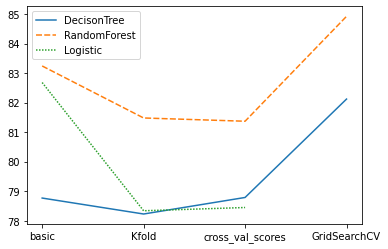

In [ ]:
sns.lineplot(data=result.T)